# PS 88 Lab 5: Political Competition, Theory and Data

In this lab we will explore some theories of the ideological position of candidates, and then see how they line up with some real data.

In [74]:
from datascience import Table
import numpy as np
%matplotlib inline

## Part 1: The Hotelling-Downs Model

First let's see how we can use the tools of Python to better understand the dynamics of the Hotelling-Downs model of political competition. 

So we have some "real" data as motivation, let's bring back the data from the survey of the class where I asked you all to place yourelf on a 1-7 point scale from "Very Liberal" to "Very Conservative". Let's reload the data.

In [75]:
classdata = Table.read_table("PS88survey.csv")
classdata

Respondent,PD_US,PD_Class,PD_prC_US,PD_prC_Class,Proposer,Responder,GT,LibCon,LibConGuess,WarmFuzzy
1,Defect,Defect,0.3,0.8,2,2,2,6,7,8
2,Cooperate,Cooperate,0.75,0.9,5,4,1,6,5,10
3,Cooperate,Cooperate,0.7,0.85,5,3,1,7,6,8
4,Defect,Defect,0.25,0.33,3,2,1,6,5,9
5,Cooperate,Cooperate,0.45,0.3,4,4,3,6,5,7
6,Defect,Defect,40,60,nan,1,4,4,7,7
7,Defect,Cooperate,0.2,0.5,5,4,4,6,6,9
8,Cooperate,Cooperate,0,1,6,4,2,5,5,7
9,Defect,Defect,0.2,0.1,1,1,2,5,6,10
10,Defect,Cooperate,0.33,0.75,5,1,1,3,6,10


**Question 1.1. Make a histogram of the `LibCon` variable. (Hint: add a `bins=np.arange(1,8,.5)` argument to make it look a bit nicer). What does this tell you about the distribution of political ideology in the class?**

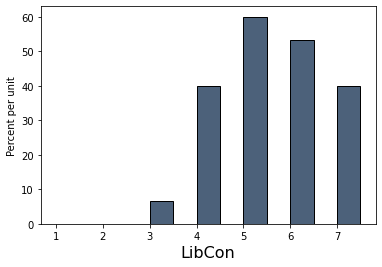

In [76]:
# Code for 1.1
classdata.hist("LibCon", bins=np.arange(1,8,.5))

*Words for 1.1*

We can now ask what would happen in hypothetical elections for "PS 88 President" under the assumption that candidates will pick vote for the candidate who is strictly closer to them if one meets that condition, and will abstain otherwise. 

For example, suppose candidate A picks a platform of 4 and candidate B picks 6. The following line of code create an array  which answers the question of whether a class member would vote for A:

In [77]:
abs(classdata.column("LibCon") - 4) < abs(classdata.column("LibCon") - 6)

array([False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False,  True, False])

We can count how many Trues there are (and hence how many A votes) by summing these:

In [78]:
sum(abs(classdata.column("LibCon") - 4) < abs(classdata.column("LibCon") - 6))

7

**Question 1.2. Write a line of code to count how many class members would vote for B. Who would win in an election between candidates with these platforms?**

In [79]:
sum(abs(classdata.column("LibCon") - 4) > abs(classdata.column("LibCon") - 6))

14

*Words for 1.2*

To make calculations like this more efficient, let's define some functions. Here is one that takes as input two platforms `xA` and `xB`, and the ideal points of the electorate as `electorate` and computes the votes that A and B would get.

In [80]:
def get_Avotes(xA,xB,electorate):
    return sum(abs(electorate - xA) < abs(electorate - xB))

In [81]:
get_Avotes(4,6, classdata.column("LibCon"))

7

**Question 1.3 Write a function called `get_bothvotes` which takes as input the platforms and the electorate ideal points, and returns an array with the number of A votes and the number of B votes.**

In [82]:
def get_bothvotes(xA,xB, electorate):
    avotes= sum(abs(electorate - xA) < abs(electorate - xB))
    bvotes= sum(abs(electorate - xA) > abs(electorate - xB))
    return [avotes, bvotes]
    

In [83]:
get_bothvotes(4,6, classdata.column("LibCon"))

[7, 14]

**Question 1.4. Use the `get_bothvotes` function to show that if party B picks a platform of 6, A could win by picking a slightly higher platform (note: parties need not pick integer platforms!). Why does this slightly higher platform lead to a much different result?**

In [84]:
get_bothvotes(4.1,6, classdata.column("LibCon"))

[16, 14]

*Words for 1.4*

**Question 1.5. Show that if party  B picks a platform of 6, party A could also win by picking something slightly below this.**

In [85]:
# Code for 1.5
get_bothvotes(5.9, 6, classdata.column("LibCon"))

[16, 14]

**Question 1.6. Write code to find the median position of the class. Then use the `get_bothvotes` function to show that if candidate A places themselves at the median, then B will lose if placing themself slightly higher or lower but tie if also going to the median.**

In [86]:
# Code for 1.6.
np.median(classdata.column("LibCon"))

5.0

In [87]:
get_bothvotes(5, 4.9, classdata.column("LibCon"))

[23, 7]

In [88]:
get_bothvotes(5, 5.1, classdata.column("LibCon"))

[16, 14]

In [89]:
get_bothvotes(5, 5, classdata.column("LibCon"))

[0, 0]

Note that our function can also see how he same platforms would do with a different electorate. Let's define `opp_class` as an electorate with the exact opposite preferences you reported. Since the ideology is on a 1-7 scale, 8-ideology will also be on a 1 to 7 scale (think about why!)

In [90]:
opp_class = 8- classdata.column("LibCon")
opp_class

array([2, 2, 1, 2, 2, 4, 2, 3, 3, 5, 1, 3, 2, 3, 1, 4, 1, 1, 3, 4, 2, 3,
       3, 4, 4, 1, 2, 3, 4, 3])

**Question 1.7. What does the Downs-Hotelling model say about the NE party positions with this electorate? Confirm this by showing that if A picks this position and B picks someting slightly lower or higher, A will get more votes.**

In [91]:
# Code for 1.7
np.median(opp_class)

3.0

In [92]:
get_bothvotes(3,2.9, opp_class)

[16, 14]

In [93]:
get_bothvotes(3,3.1, opp_class)

[23, 7]

*Words for 1.7*

**Qustion 1.8. Find pairs of platforms where (1) A would win with the class electorate but B would win with the opposite electorate, and (2) A would win with either electorate.**

In [94]:
get_bothvotes(3,5, opp_class)

[23, 1]

In [95]:
get_bothvotes(3,5, classdata.column("LibCon"))

[1, 23]

In [96]:
get_bothvotes(2,1, opp_class)

[24, 6]

In [97]:
get_bothvotes(2,1, classdata.column("LibCon"))

[30, 0]

## Part 2: Multiple Electorates, Multiple Elections

To connect this theory to some data we will explore, let's imagine there are a bunch of districts, which have voters with diffeent ideological distributions, which we will generate randomly. 

In each district, there is a "district election" (which will correspond to a member of the legislature) and a "national election". 

We will assume the "district" election happens as in the theory above, and so the winning candidate will have a platfom equal to the position of the median voter. As in the theory, we assume that this platform is "credible" in the sense that the winning candidate will implement this platform if in office.

We will assume that (for reasons not explicitly modeled), in the national election there are two candidates L and R who place themselves at positions 2 and 6, and voters pick the candidate closest to them. From this will compute the R vote share. 

Finally, we will look at the relationship between the result of the national election and the district election.

Let's define some variables which will correspond to the number of districts (set to 400, to approximate the data we will use later). We also set the district size to 100 voters; this is much smaller than the context of house disticts we will look at, but making it bigger will just make the code run more slowly.

In [98]:
n_dist = 400
dist_size = 100

Within each district we want to create some random voter ideologies. If we just make all of them come from the same distribution, then the median in each district will be pretty similar (you will learn more about this when you study sampling in Data 8). 

In reality, more liberal and conservative voters tend to cluster in different districts, as they did in our class! To reflect this, we will simulate our electorate in two steps. First, we will create random district means which range from 2 to 6, and then we will simulate the individual voter ideologies.

To do this, we can use the `np.random.rand(n)` function, which creates n random numbers between 0 and 1. These follow a "uniform" distribution which loosely means that all values are equally likely. For example this creates `n_dist` random numbers between 0 and 1 then puts it in a table so we can make a histogram with the `.hist` function.

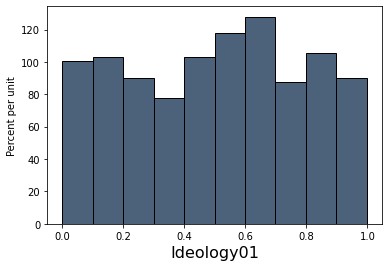

In [99]:
ideology01 = np.random.rand(n_dist)
dist_data = Table().with_column("Ideology01", ideology01)
dist_data.hist("Ideology01")

If we want the district ideology to have a different range, we can "transform" this variable. For example. if we wanted it to range from 1 to 7 we can create the following variable, and confirm the range (and also check the average):

In [100]:
ideology17 = 1 + 6*ideology01
print(np.min(ideology17), np.mean(ideology17) ,np.max(ideology17))

1.0055077825911782 4.016706146208279 6.986886722976664


For our simulation we want the mean ideology to range from 2 to 6. 


**Question 2.1. Write code to (1) create an array called `dist_means` which is uniformly distribtued from 2 to 6, (2) add it to the `dist_data` table, and (3) make a histogram to confirm that it has the range that we want.**

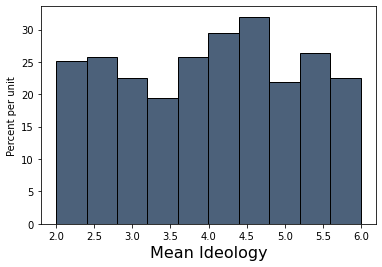

In [101]:
dist_means = 2 + 4* ideology01
dist_data = Table().with_column("Mean Ideology", dist_means)
dist_data.hist("Mean Ideology")

Now let's create individual voter idologies. To do this for the first district, let's first figure out the mean ideology there:

In [102]:
dist_means[0]

4.253773944387829

Let's assume that within each district, the individual voters' ideologies are between the district mean - 2 and the district mean +2. We then check what the median voter ideology is within our test district.

In [103]:
test_dist_voters = dist_means[0] -2 + 4*np.random.rand(dist_size)
np.median(test_dist_voters)

4.205663068298635

We can see how this district would vote in the national election with candidate platforms at 2 and 6 using the `get_bothvotes` function we defined above.

In [104]:
get_bothvotes(2,6,test_dist_voters)

[41, 59]

**Question 2.2. Now do the same thing to simulate `dist_size` voters in district 2, and compute (1) the district median ideology and (2) the number of votes for each canddiate on the national level. Compare both to the first district.** 

In [105]:
# Code for 2.2

Rather than going through these 1 by 1, let's write a loop which (1) simulates the voter ideologies in the district, and then (2) computes the district median and national vote share.

In [106]:
dist_elec_dh = []
nat_elec= []
for i in range(n_dist):
    dist_voters = dist_means[i] + 6*np.random.rand(dist_size) - 3
    dist_elec_dh = np.append(dist_elec_dh, np.median(dist_voters))
    lvotes = sum(abs(dist_voters - 2) < abs(dist_voters - 6))
    rvotes = sum(abs(dist_voters - 2) > abs(dist_voters - 6))
    nat_elec = np.append(nat_elec, rvotes/(lvotes + rvotes))
    

**Question 2.3. Add the median district ideology (call this "District DH" to emphasize this is the prediction from the Downs-Hotelling model) and national vote share to the `dist_data` table, and then make a scatter plot with the national vote share on the x axis and the district median on the y axis. Interpret this graph**

In [107]:
dist_data = dist_data.with_columns("District DH", dist_elec_dh, "National", nat_elec)
dist_data

Mean Ideology,District DH,National
4.25377,3.96619,0.48
4.25812,4.39944,0.54
4.09328,3.89644,0.47
2.76591,2.36643,0.31
5.92659,6.07068,0.82
5.83774,5.49431,0.79
2.86478,3.04442,0.35
5.07435,4.96661,0.64
3.08819,3.38856,0.4
3.04919,3.16524,0.34


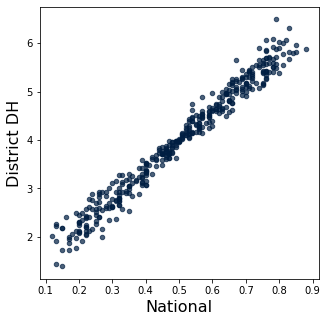

In [108]:
dist_data.scatter("National", "District DH")

## Part 3: Party Loyalty Theory

One thing that we might think is missing in the Downs-Hotelling theory is the role of parties. In most political systems, candidates don't just run on an ideology, they also usually run with a party label as well. (Sometimes people *only* have the option to vote for parties.) Further, once in office, legislators are typically pressued to vote with the party, though there is hetereogeneity here across countries as well.

Let's consider an extreme version of a model with party loyalty/discipline. As above, suppose the "national" platforms for the L party is at 2 and the R party is at 6. Voters in each district get a choice to vote for a candidate from the L party, expecting that they will vote with the national L party, or a candidate from the R party who will vote with her national party. As a result, voters will vote for the L party if their ideology is closer to 2 and for the R party if their ideology is closer to 6.

We already have a variable which indicates what proportion of each district prefers 6 to 2: that is just the `National` variable. However, if we want to predict legislator behavior, we want to variable that is equal to 2 if more than half of the voters prefer this, and equal to 6 if more than half of the voters prefer that. 

**Question 3.1. Create a variable called `District PL` which indicates how the legislator will vote in each district given this theory, and add it to the `dist_data` table. (Hint: you can assume that if there is a tie, the R party wins (or the L party wins).**

In [109]:
district_pl = (dist_data.column("National") < .5)*2 + (dist_data.column("National") >= .5)*6
dist_data = dist_data.with_column("District PL", district_pl)

**Question 3.2. Make a scatter plot with the National vote share on the x axis and the winning legislator position on the Y axis. Compare this to the DL prediction.**

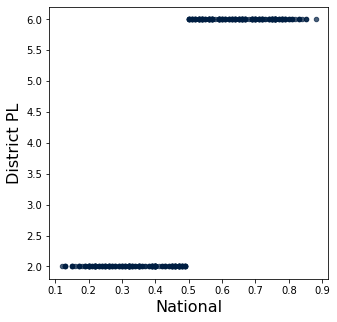

In [110]:
dist_data.scatter("National", "District PL")

## Part 4: The Data

Now let's look at some real data, which comes from <a href="https://www.jstor.org/stable/2669364?seq=1#metadata_info_tab_contents">this paper</a>. The data study members of the House of Representatives who were elected in 2000. To measure their "platform" or "position", the authors use how they voted on bills after being elected. This is measured in the `Member Position` variable. It ranges from 0, meaning most liberal, to 1, meaning most conservative.

To get at the ideology of the district, we can use how citizens within that districted voted in the 2000 presidential election. In particular, if we use `Bush` as our x axis variable that will give a sense of how conservative the median voter of the district is.

There are also some other virables that may be of interest: The party of the member, how often they voted with their party, their gender, etc.

In [111]:
realdata = Table.read_table("housedata.csv")
realdata

State,Gore,Bush,location,first_name,middle_name,last_name,district,votes_with_party_pct,votes_against_party_pct,party,suffix,gender,geoid,Member Position
AK,0.28,0.59,AK1,Don,nan,Young,1,0.92,0.0757,R,nan,M,200,0.92
AL,0.38,0.6,AL1,Sonny,nan,Callahan,1,0.94,0.0589,R,nan,nan,101,0.94
AL,0.38,0.61,AL2,Terry,nan,Everett,2,0.95,0.0486,R,nan,M,102,0.95
AL,0.47,0.52,AL3,Bob,nan,Riley,3,0.93,0.0718,R,nan,M,103,0.93
AL,0.37,0.61,AL4,Robert,B.,Aderholt,4,0.9,0.0986,R,nan,M,104,0.9
AL,0.44,0.54,AL5,Robert,E.,Cramer,5,0.8,0.1988,D,nan,M,105,0.2
AL,0.25,0.74,AL6,Spencer,nan,Bachus,6,0.93,0.0699,R,nan,M,106,0.93
AL,0.66,0.33,AL7,Earl,F.,Hilliard,7,0.87,0.1248,D,nan,M,107,0.13
AR,0.5,0.48,AR1,Marion,nan,Berry,1,0.81,0.1859,D,nan,M,501,0.19
AR,0.48,0.49,AR2,Vic,nan,Snyder,2,0.92,0.0755,D,nan,M,502,0.08


**Question 4.1. To see the empirical analog of our theoretical predictions, make a scatter plot with `Bush` on the x axis and `Member Position` on the y axis.**

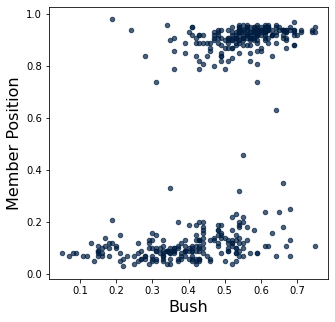

In [112]:
realdata.scatter("Bush", "Member Position")

You should see two "clumps" of data, which given the discussion above might correspond to the two parties. Make a version of the same graph, but use the `group` option to label the points by party.

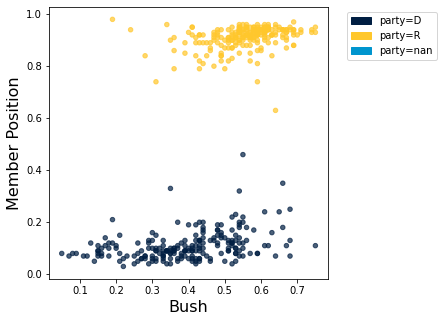

In [113]:
realdata.scatter("Bush", "Member Position", group="party")

**Question 4.2. Compare this to the theoretical predictiosn of the Downs-Hotelling model and the Party Loyalty model. Which looks "closer" to reality, and why?**

*Words for 4.2*

Another thing we might want to check is whether *within the same party* members from more conservative districts vote in a more conservative fashion. 

**Question 4.3. To check this, make two scatterplots, one for each party (hint: use the `where` function), which also include a `fit_line=True` argument to draw a best fit line.**

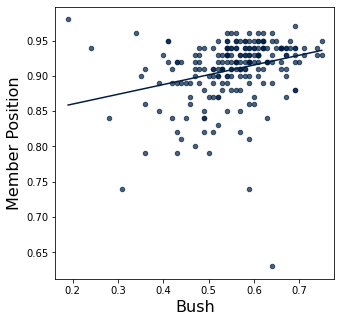

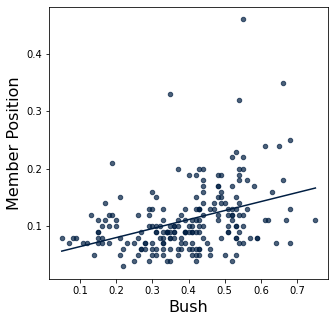

In [116]:
realdata.where("party", "R").scatter("Bush", "Member Position", fit_line=True)
realdata.where("party", "D").scatter("Bush", "Member Position", fit_line=True)

**Question 4.4. Interpret these graphs in light of the Downs-Hotelling and Party Loyalty theories.**

## Part 5: A Hybrid Theory

Perhaps a better theory to explain the voting behavior of members of the House combines the two models. A simple way we can do that is to predict a *weighted average* of the two predictions. Loosely, we can interpret this as predicting that members of congress sometimes get to vote according to their own/their district ideology, but other times have to vote with the party. Here is a simple function to compute the weighted average of two columns/arrays with weight $w$:

In [117]:
def w_avg(x,y,w):
    return w*x + (1-w)*y

We can use this to compute the regular average of two numbers if we put the weight at $w=.5$:

In [118]:
w_avg(2,6, .5)

4.0

If we increase the $w$ parameter, we put more weight on the first number:

In [119]:
w_avg(2,6, .8)

2.8

We can also apply this to arrays:

In [120]:
w_avg(np.array([5,3,2]), np.array([8,5,1]), .8)

array([5.6, 3.4, 1.8])

**Question 5.1. Create a variable which is equal to an equal weighted average ($w=.5$) of the prediction of the DH theory and the PL theory, and add it to the `dist_data` table with the name "District Hybrid".**

In [121]:
dist_hybrid = w_avg(dist_data.column("District DH"), dist_data.column("District PL"), .5)
dist_data = dist_data.with_column("District Hybrid", dist_hybrid)

**Question 5.2 Make a scatter plot with "National" on the x axis and the hybrid prediction on the Y axis.**

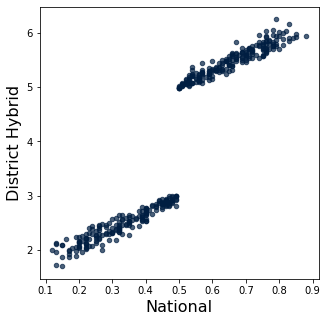

In [122]:
dist_data.scatter("National", "District Hybrid")

**Question 5.3. Repreat this process for $w=.2$ and $w=.8$. Which of these looks closest to the real data? What might this tell us about the relative importance of the two theories?**

*Words for 5.3*

**Question 5.4. What else might we want to add to our theory to make it more realistic/fit the theory better? (No need to write any code here, but if you want to that's great!)**

*Words for 5.4*